In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
import pandas as pd
import scipy.stats as sts

In [2]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
bayeselo_direc = 'C:/Users/svo/Documents/Sourcetree repos/fourinarow/Analysis notebooks/new/'

In [3]:
def create_bayeselo_input(results,name):
    with open(name,'w') as f:
        for black,white,r in results:
            outcome = ('1-0' if r==1 else ('0-1' if r==-1 else '1/2-1/2'))
            print('[White \"' + black +'\"]',file=f)
            print('[Black \"' + white +'\"]',file=f)
            print('[Result \"' + outcome +'\"]',file=f)
            print(outcome,file=f)
            print(file=f)
            
def run_bayeselo(names):
    wd = os.getcwd()
    os.chdir(bayeselo_direc)
    bayeselo_input = '\n'.join(['readpgn ' + name for name in names] + ['elo','mm 1 1','ratings','x','x'])
    bayeselo_output = subprocess.check_output('bayeselo.exe',input=bayeselo_input, text=True, stderr=subprocess.STDOUT).split('\n')
    os.chdir(wd)
    start_line = [i+1 for i,line in enumerate(bayeselo_output) if line.startswith('ResultSet-EloRating>Rank')][0]
    df = pd.DataFrame([line.split() for line in bayeselo_output[start_line:-1]],
                  columns = ['','Name','Elo','','','','','',''])[['Name','Elo']]
    df['Elo'] = df['Elo'].astype(int)
    elo_ratings = dict(df.values)
    return elo_ratings

In [4]:
with open(direc + 'Peak/peak_vs_experiment_agents.txt','r') as f:
    results = [line.split('\t')[:2] + [int(line.split('\t')[2])] for line in f.read().splitlines()]

In [5]:
create_bayeselo_input(results,direc + 'Peak/peak_vs_expt.pgn')

In [6]:
elo_peak_agents_vs_expt_agents = run_bayeselo([direc + 'Peak/peak_vs_expt.pgn'])

In [7]:
elo_peak_agents_vs_expt_agents

{'comp002': 354,
 'comp001': 316,
 'comp000': 245,
 'comp003': 239,
 'comp007': 221,
 'comp004': 187,
 'comp008': 174,
 'comp010': 159,
 'peak_opp_180_199': 128,
 'peak_opp_170_199': 118,
 'comp011': 115,
 'comp005': 114,
 'comp009': 112,
 'comp006': 95,
 'peak_opp_140_160': 94,
 'comp019': 73,
 'peak_opp_150_165': 66,
 'peak_opp_175_185': 51,
 'peak_opp_110_130': 20,
 'comp013': 11,
 'comp012': 1,
 'peak_opp_80_100': -7,
 'comp021': -16,
 'comp014': -32,
 'comp016': -51,
 'comp015': -66,
 'comp020': -71,
 'comp017': -93,
 'peak_opp_20_40': -97,
 'peak_opp_50_70': -99,
 'comp018': -124,
 'comp022': -134,
 'comp023': -180,
 'comp027': -190,
 'peak_opp_5_10': -192,
 'comp024': -215,
 'comp025': -229,
 'comp026': -302,
 'comp029': -346,
 'comp028': -449}

In [8]:
with open(direc + 'Peak\peak_eloinput_paper.pgn') as f:
    peak_games = f.read().split('\n\n')

In [9]:
peak_games_short = '\n\n'.join([game for game in peak_games if '_block' in game] + 
                               list(np.random.choice([game for game in peak_games if not '_block' in game],0,replace=False)))

In [10]:
with open(direc + 'Peak/peak_games_short.pgn','w') as f:
    print(peak_games_short,file=f)

In [11]:
elo_peak_games_short = run_bayeselo([direc + 'Peak/peak_games_short.pgn'])

In [12]:
peak_opponents = [player for player in elo_peak_games_short.keys() if player.startswith('peak_opp')]

In [13]:
peak_opponents

['peak_opp_175_185',
 'peak_opp_170_199',
 'peak_opp_150_165',
 'peak_opp_180_199',
 'peak_opp_140_160',
 'peak_opp_110_130',
 'peak_opp_80_100',
 'peak_opp_50_70',
 'peak_opp_20_40',
 'peak_opp_5_10']

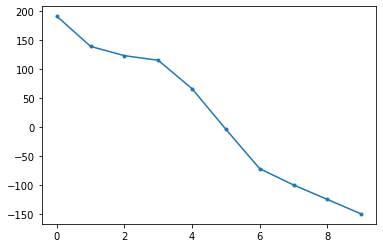

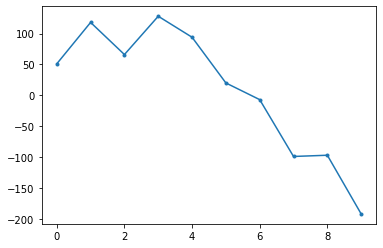

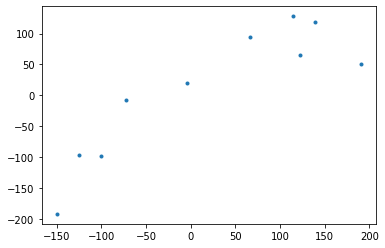

In [14]:
plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.-')
plt.show()

plt.plot([elo_peak_games_short[opp] for opp in peak_opponents],
         [elo_peak_agents_vs_expt_agents[opp] for opp in peak_opponents],'.')
plt.show()

In [15]:
elo_ratings_all = run_bayeselo([direc + 'Peak/peak_vs_expt.pgn',direc + 'Peak/peak_games_short.pgn',
                                direc + 'Ratings/games_results_eye.pgn',direc + 'Ratings/games_results_gen.pgn',
                                direc + 'Ratings/games_results_learn.pgn',direc + 'Ratings/games_results_tai.pgn'])


In [16]:
import json
with open(direc + 'Ratings/ratings_all_expts_peak.txt','w') as f:
    json.dump(elo_ratings_all,f)

In [17]:
elo_ratings_all

{'subj03sess04': 409,
 'subj08sess03': 322,
 'comp001': 317,
 'subj18sess04': 314,
 'subj10cond00': 310,
 'subj26sess01': 308,
 'subj21sess02': 304,
 'comp002': 303,
 'subj27sess03': 297,
 'subj03sess02': 295,
 'comp000': 290,
 'subj26sess04': 276,
 'ZAhCMtLOSa_block60': 270,
 'subj001': 263,
 'subj27sess02': 263,
 'subj16cond01': 262,
 'subj04sess03': 260,
 'subj16sess03': 257,
 'subj12sess04': 250,
 'subj01sess04': 250,
 'subj03sess01': 249,
 'subj27sess04': 246,
 'comp003': 237,
 'subj04sess04': 235,
 'subj039': 234,
 'subj023': 233,
 'subj23sess00': 229,
 'subj16sess02': 227,
 'eye_subj009': 225,
 'comp004': 221,
 'DsMabUjLzp_block100': 215,
 'subj13sess03': 213,
 'subj26sess03': 204,
 'subj13sess02': 203,
 'subj18sess00': 200,
 'subj13sess04': 200,
 'subj04sess02': 199,
 'tnGMrUGByz_block80': 198,
 'eye_subj005': 198,
 'subj08sess04': 195,
 'subj03sess03': 192,
 'subj24sess03': 190,
 'ovIeXCoase_block60': 189,
 'subj27sess01': 182,
 'subj29sess04': 181,
 'AREwvNqTxc_block20': 180,